# CSCI 3202, Fall 2020

# Friday November 20, 2020

# In-class notebook:  (Passive?) Q-Learning

<a id='top'></a>

<br>


Shortcuts:  [Top](#top) || [Setup](#setup) || [Training](#train) || [OOP](#oop) || [Wrapup](#end) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats

The first half of the code below is adapted from https://blog.floydhub.com/an-introduction-to-q-learning-reinforcement-learning/, an example by Sayak Paul.

<br>

---

## Problem Setup

<a/ id='setup'></a>


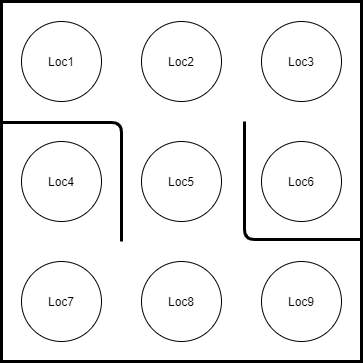

This is a *route-finding* problem.  Suppose we can move across the maze given where at any state we can move to the adjacent states, if not blocked by walls.

In [2]:
# Define the states
location_to_state = {
    'L1' : 0,
    'L2' : 1,
    'L3' : 2,
    'L4' : 3,
    'L5' : 4,
    'L6' : 5,
    'L7' : 6,
    'L8' : 7,
    'L9' : 8
}

# Define the actions
actions = [0,1,2,3,4,5,6,7,8]

# Define the rewards
rewards = np.array([[0,1,0,0,0,0,0,0,0],
              [1,0,1,0,1,0,0,0,0],
              [0,1,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,1,0,0],
              [0,1,0,0,0,0,0,1,0],
              [0,0,1,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,1,0],
              [0,0,0,0,1,0,1,0,1],
              [0,0,0,0,0,0,0,1,0]])
rewards

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [3]:
# Maps indices to locations
state_to_location = dict((state,location) for location,state in location_to_state.items())
state_to_location

{0: 'L1',
 1: 'L2',
 2: 'L3',
 3: 'L4',
 4: 'L5',
 5: 'L6',
 6: 'L7',
 7: 'L8',
 8: 'L9'}

In [4]:
# Initialize parameters
gamma = 0.75 # Discount factor 
alpha = 0.9 # Learning rate



<br>

---

## Training:

<a/ id='train'></a>


Let's implement a temporal-difference agent that updates Q-values along the way.  This agent will:

- have a desired goal state, with large positive rewards associated with reaching it
- have training episodes:pick a state at random and undertake exactly one move from it.  Update Q-values.
- Moves will be non-random: there is no transition probability matrix, and $P(s'| a \, s)=1$ for the desired successor state
- Eventually try to pick out the best move available at any given tile: or the shortest path from any start location to the goal state!

In [5]:

ending_state=(2)

# Initializing Q-Values
Q = np.array(np.zeros([9,9]))
# reward the exit/end location
rewards_new=np.copy(rewards)
rewards_new[ending_state,ending_state] = 999

for i in range(10000):
    # Pick up a state randomly
    current_state = np.random.randint(0,9)

    playable_actions = []
# Iterate through the new rewards matrix and get the actions > 0
#realistically this should live in its own dictionary/matrix first thing, and NOT BE RECOMPUTED
    for j in range(9):
        if rewards_new[current_state,j] > 0:
            playable_actions.append(j)
#     print(current_state, playable_actions)
    next_state = np.random.choice(playable_actions) #random choice of action for the learning
    
    # Compute the Q difference between current state and where we ended up
    QD = rewards_new[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state,next_state]

    # Update the Q-Value for the action taken using the Bellman equation
    Q[current_state,next_state] += alpha * QD

print(Q)

[[   0.         2249.5           0.            0.            0.
     0.            0.            0.            0.        ]
 [1688.125         0.         2998.            0.         1688.125
     0.            0.            0.            0.        ]
 [   0.         2249.5        3996.            0.            0.
  2249.5           0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.          951.3203125     0.            0.        ]
 [   0.         2249.5           0.            0.            0.
     0.            0.         1267.09375       0.        ]
 [   0.            0.         2998.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.            0.          714.49023437    0.
     0.            0.         1267.09375       0.        ]
 [   0.            0.            0.            0.         1688.125
     0.          951.3203125     0.          951.3203125 ]
 [   0.   

In [ ]:
def get_optimal_route(start_location,end_location, Q):
    route = [start_location]
    # We do not know about the next location yet, so initialize with the value of 
    # starting location
    next_location = start_location
    
    # We don't know about the exact number of iterations
    # needed to reach to the final location hence while loop will be a good choice 
    # for iteratiing
    
    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        
        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Q[starting_state,])
        
        # We got the index of the next state. But we need the corresponding letter. 
        next_location = state_to_location[next_state]
        route.append(next_location)
        
        # Update the starting location for the next iteration
        start_location = next_location
    
    return route

get_optimal_route('L5','L3',Q)

Now, that function will currently only guaranteed work if the end_location is 'L3', since that's the `end_location=2` 
we rewarded and used to solve for the Q-values.  Here's the above all glued into one function, so we can choose any start and end location: 

In [ ]:
def get_optimal_route(start_location,end_location):
    # Copy the rewards matrix to new Matrix
    rewards_new = np.copy(rewards)
    
    # Get the ending state corresponding to the ending location as given
    ending_state = location_to_state[end_location]
    
    # With the above information automatically set the priority of  
    # the given ending state to the highest one
    rewards_new[ending_state,ending_state] = 999

    # -----------Q-Learning algorithm-----------
   
    # Initializing Q-Values
    Q = np.array(np.zeros([9,9]))

    # Q-Learning process
    for i in range(1000):
        # Pick up a state randomly
        current_state = np.random.randint(0,9) # Python excludes the upper bound
        
        # For traversing through the neighbor locations in the maze
        playable_actions = []
        
        # Iterate through the new rewards matrix and get the actions > 0
        for j in range(9):
            if rewards_new[current_state,j] > 0:
                playable_actions.append(j)
        
        # Pick an action randomly from the list of playable actions  
        # leading us to the next state
        next_state = np.random.choice(playable_actions)
        
        # Compute the Q-difference between where we started and where we ended up.
        QD = rewards_new[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state,next_state]
        
        # Update the Q-Value using the Bellman equation
        Q[current_state,next_state] += alpha * QD

     # Initialize the optimal route with the starting location
    route = [start_location]
    # We do not know about the next location yet, so initialize with the value of 
    # starting location
    next_location = start_location
    
    # We don't know about the exact number of iterations
    # needed to reach to the final location hence while loop will be a good choice 
    # for iteratiing
    
    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        
        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Q[starting_state,])
        
        # We got the index of the next state. But we need the corresponding letter. 
        next_location = state_to_location[next_state]
        route.append(next_location)
        
        # Update the starting location for the next iteration
        start_location = next_location
    
    return route

get_optimal_route('L9','L2')

<br>

---

## An OOP rendition:

<a/ id='oop'></a>


Of course, we could also create a class for the agent, that needs all of these things in intialization and spans a broader class of problems.

In [ ]:
class QAgent():
    
    # Initialize alpha, gamma, states, actions, rewards, and Q-values
    def __init__(self, alpha, gamma, location_to_state, actions, rewards, state_to_location, Q):
        
        self.gamma = gamma  
        self.alpha = alpha 
        
        self.location_to_state = location_to_state
        self.actions = actions
        self.rewards = rewards
        self.state_to_location = state_to_location
        
        self.Q = Q
        
    # Training
    def training(self, start_location, end_location, iterations):
        
        rewards_new = np.copy(self.rewards)
        
        ending_state = self.location_to_state[end_location]
        rewards_new[ending_state, ending_state] = 999
        
        for i in range(iterations):
            current_state = np.random.randint(0,9) 
            playable_actions = []

            for j in range(9):
                if rewards_new[current_state,j] > 0:
                    playable_actions.append(j)
    
            next_state = np.random.choice(playable_actions)
            QD = rewards_new[current_state,next_state] + \
                    self.gamma * self.Q[next_state, np.argmax(self.Q[next_state,])] - self.Q[current_state,next_state]
            
            self.Q[current_state,next_state] += self.alpha * QD

        route = [start_location]
        next_location = start_location
        
        # Get the route 
        self.get_optimal_route(start_location, end_location, next_location, route, self.Q)
        
    # Get the optimal route
    def get_optimal_route(self, start_location, end_location, next_location, route, Q):
        
        while(next_location != end_location):
            starting_state = self.location_to_state[start_location]
            next_state = np.argmax(Q[starting_state,])
            next_location = self.state_to_location[next_state]
            route.append(next_location)
            start_location = next_location
        
        print(route)
        

In [ ]:
qagent = QAgent(alpha, gamma, location_to_state, actions, rewards,  state_to_location, Q)
qagent.training('L9', 'L1', 1000)

<br>

---

## Roundup:

<a/ id='end'></a>


There are a few reasons this code might be unsatisfactory, and only could handle a very small subset of problems we want a `QAgent()` to handle!  We might have to adjust it for a variety of things in a real-world problem that isn't just route-finding on an open grid.

**Not perfectly observable state space**, or **Real Training**

In the above code, our "training episodes" consisted of exactly one move each.  This is atypical!  It's more common to have some kind of double loop, where the inner loop is an entire route-find including random actions and the outer loop repeats that experiment.  This would lead to a variable amount of Q-updates per trip through the inner loop!

We need those extra episodes for two reasons:

- many agents don't get to start with all locations/states initialized.  They have to explore the state and add to those dicitonaries as new states are discovered!  We would want a function that appends as we go.
- Allowing the agent to explore route sequentially allows to eventually prioritize **exploitation** over just **exploration**.

**Truly Stochastic movement**

In the example above, we used `np.random.choice(playable_actions)` to choose an action, and then immediately retrieved `next_state` from it.  More realistically, we might want some stochastic component, where there's a function that tells us next state as a function of action, but it's probabilitistic: 

In [ ]:
def new_state(state, movement):
    #Function that returns the result of *ACTUAL* movement; e.g.
    #if movement = up:
        #return (state[0], state[1]+1)
    #if movement = right:
        #return (state[0]+1, state[1])
    return

#here's one we've seen before: Prob=p we take the desired action, 1-p we randomly get another action
def transition(state, action, playable_actions,p):
    roll=np.random.random()
    
    if roll<p:
        print(state, action)
        return new_state(state,action)
    if roll>p:
        result_action=np.random.choice(playable_actions) #or maybe playable actions exluding "action"
        print(state, result_action)
        return new_state(state,result_action)

for i in range(20):
    transition(0,1,[2,3], .80)


Note that if we do this, we still update the Q-values corresponding to `(state, action)`, but the "other" location which we use to increment rewards and calculate the Q-difference is the output state of the `transition` function, not the Q value of where we "tried" to move.

Crucially the `new_state` function is the one that describes the **actual process** if the problem is one that we don't always know how things result.  This is often hidden from our agent: what will the computer do/the screen look like if we push "right" on the controller in a game of Pac-Man?  This is in the next_state portion of the model, and could require us actually just implement the action given by transition and record what actually happens!

**Learning Exploration rather than truly random**

Not only is the movement itself deterministic in our opening problem, our agent is using `np.random.choice(playable_actions)` to choose which state-action pair to update!

In reality, we often want to encourage our agent to persue rewards, especially as the sample space may become too large to brute-force all possible state-action pairs.

A more appropriate implementation of that choice might be to create a function and a new dictionary:

In [ ]:
actstaken={}

for location,state in location_to_state.items():
    for location,action in location_to_state.items():
        actstaken[(state,action)]=0
        
actstaken

#inflate utility by a multiple until we've taken that action "ne" times
def explorationfunc(utility, actstaken,ne=10):
    if actstaken>ne:
        return utility
    else: return utility*10
print(actstaken)

Then we would replace the `np.random.choice(playable_actions)` with a function that evaluates the 'explorationfunc' at each of the playable actions, and chooses that one.  After we observe the `next_state` from that action, we would update the actstaken counter accordingly.  And possible also the utility in the same dictionary!


For this problem tuples of the form `(state1, state2)` work as actions.  This led to a quare matrix or an $n^2$ size dictionary above.  More generally, a similar problem would work with tuples of the form `(location, direction)`, where each location has only a few *actions* associated with it, like "Up", "Down", "Left", "Right", etc.

In reality, we could hold a *single* dictionary thats of the form:

actions={

(0,'right'): [Qval, ne],

(1,'left'): [Qval, ne],

(1,'down'): [Qval, ne],

(1,'right'): [Qval, ne],

...}

Or we could nest the dictionaries, so the structure becomes:

actions={

0: {'right': [Qval, ne]},

1: {'left': [Qval, ne], 'down': [Qval, ne], 'right': [Qval, ne]},

...}


The nested dictionaries is particularly appealing if the `state` tuples start becoming more complex, like multivariate data.  We'll play with an example where `state=(position, velocity)` in a future example!